# Importing Libraries

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option("display.max_colwidth", None)

# Reading Data and Exploratory Data Analysis

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

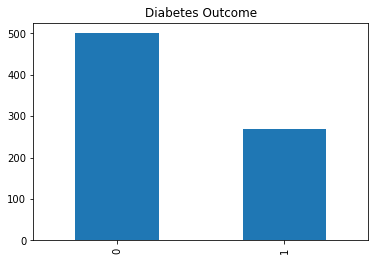

In [5]:
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

In [6]:
#proportion of diabetes patients
df.Outcome.value_counts()[1] / df.Outcome.count()

0.3489583333333333

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


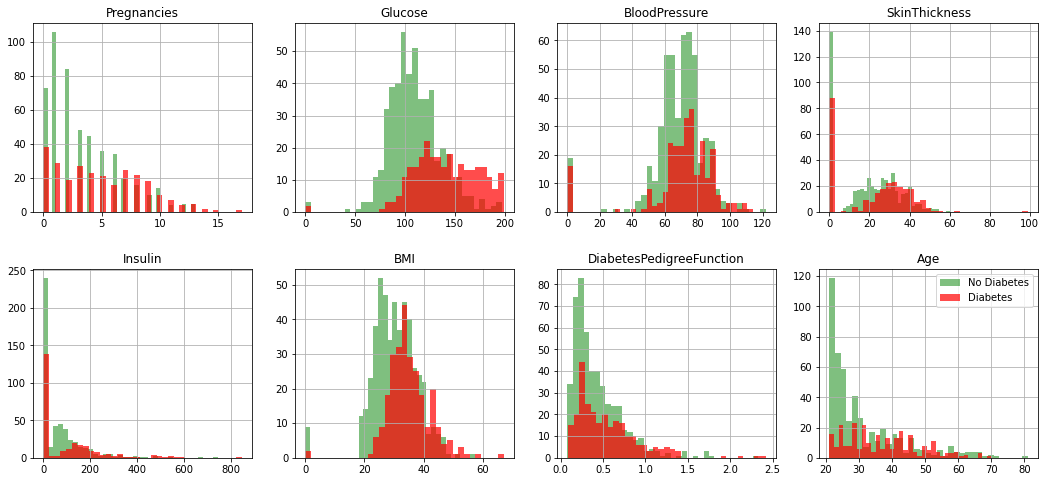

In [8]:

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    

    df[df.Outcome==0][feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)
    df[df.Outcome==1][feature].hist(bins=35, color='red', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)


In [9]:
df.isnull().values.sum()

0

In [10]:
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    m = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, m)

In [11]:
x_data = df.drop("Outcome", inplace=False, axis=1)
y_data = df["Outcome"]

# Splitting Dataset into Training and Testing set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

# Data Standardization

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

# K Nearest Neighbour Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
model_knn = knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

In [16]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model_knn,x_data, y_data, cv=kfold)
R2 = results.mean()*100
print("Baseline : %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Baseline : 72.14% (3.79%)


# Linear Classifier

In [17]:
lin = SGDClassifier()
model_linear = lin.fit(x_train, y_train)
y_pred=lin.predict(x_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

In [18]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model_linear,x_data, y_data, cv=kfold)
R3 = results.mean()*100
print("Baseline : %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Baseline : 60.44% (9.25%)


# Random Forest Classifier

In [19]:
rf  = RandomForestClassifier(n_estimators=100)
model_ran = rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7467532467532467

In [20]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(model_ran,x_data, y_data, cv=kfold)
R1 = results.mean()*100
print("Baseline : %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Baseline : 77.08% (4.55%)


# Decision Tree Classifier

In [21]:
tree = DecisionTreeClassifier()
model_tree = tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
accuracy_score(y_test, y_pred)

0.7012987012987013

In [22]:
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(model_tree,x_data, y_data, cv=kfold)
R4 = results.mean()*100
print("Baseline : %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Baseline : 69.78% (3.97%)


# Support Vector Machine Classifier

In [23]:
svm = SVC()
model_svm = svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)
accuracy_score(y_test, y_pred)


0.7532467532467533

In [24]:
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(model_svm, x_data, y_data, cv=kfold)
R5 = results.mean()*100
print("Baseline : %.2f%% (%.2f%%)" %(results.mean()*100, results.std()*100))

Baseline : 75.26% (3.84%)


# Comparision of Accuracy

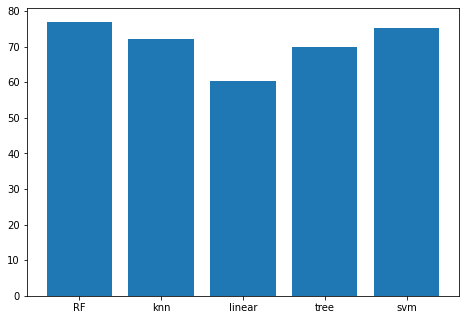

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['RF', 'knn', 'linear', 'tree', 'svm']
results = [R1,R2,R3,R4,R5]
ax.bar(models,results)
plt.show()

In [26]:
from sklearn.ensemble import VotingClassifier


In [31]:
voting_clf = VotingClassifier(
 estimators=[('knn', knn),('lr', lin), ('rf', rf), ('svc', svm),('tree',tree)],
 voting='hard')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=11)),
                             ('lr', SGDClassifier()),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())])

In [32]:
for clf in (knn, lin, rf,svm, tree, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7467532467532467
SGDClassifier 0.7012987012987013
RandomForestClassifier 0.7662337662337663
SVC 0.7532467532467533
DecisionTreeClassifier 0.7012987012987013
VotingClassifier 0.7467532467532467
